# Proyecto Properatio: Análisis exploratorio y Preparación de datos



Preparación de datos para entrenar un modelo de predicción del valor de las propiedades en Argentina.<br>

Creado por: Adriana Villalobos

## 1. Importación de librerías y Carga del dataset

In [441]:
import pandas as pd
from funpymodeling.exploratory import freq_tbl, status
import numpy as np

In [442]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "entrenamiento.csv"

# Load the latest version
df_raw = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "alejandroczernikier/properati-argentina-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


In [443]:
df_raw.head(1)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
0,556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,NaN,NaN,NaN,3.0,2.0,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0


### Inspección inicial

In [444]:
pd.set_option('display.max_columns', None)

In [445]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992192 entries, 0 to 992191
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               992192 non-null  int64  
 1   ad_type          992192 non-null  object 
 2   start_date       992192 non-null  object 
 3   end_date         992192 non-null  object 
 4   created_on       992192 non-null  object 
 5   lat              838994 non-null  float64
 6   lon              839929 non-null  float64
 7   l1               992192 non-null  object 
 8   l2               992192 non-null  object 
 9   l3               934737 non-null  object 
 10  l4               225395 non-null  object 
 11  l5               4711 non-null    object 
 12  l6               0 non-null       float64
 13  rooms            503045 non-null  float64
 14  bedrooms         390699 non-null  float64
 15  bathrooms        773021 non-null  float64
 16  surface_total    448164 non-null  floa

In [446]:
df_raw.shape

(992192, 25)

In [447]:
status(df_raw)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.000000,992192,int64
1,ad_type,0,0.000000,0,0.000000,1,object
2,start_date,0,0.000000,0,0.000000,346,object
3,end_date,0,0.000000,0,0.000000,450,object
4,created_on,0,0.000000,0,0.000000,346,object
5,lat,153198,0.154404,0,0.000000,317046,float64
6,lon,152263,0.153461,0,0.000000,315745,float64
7,l1,0,0.000000,0,0.000000,4,object
8,l2,0,0.000000,0,0.000000,42,object
9,l3,57455,0.057907,0,0.000000,1262,object


In [448]:
# busco duplicados, imprimo el total y los elimino
print(f"Total de duplicados: {df_raw.duplicated().sum()}")
df_raw = df_raw.drop_duplicates()

Total de duplicados: 0


In [449]:
df_raw[['l1', 'l2', 'l3', 'l4','l5']].sample(10)

,l1,l2,l3,l4,l5
218191,Uruguay,Maldonado,La Barra,NaN,NaN
609380,Argentina,Córdoba,Córdoba,General Paz,NaN
840719,Argentina,Córdoba,Córdoba,NaN,NaN
494811,Argentina,Capital Federal,Palermo,NaN,NaN
150242,Argentina,Capital Federal,Recoleta,NaN,NaN
22513,Argentina,Santa Fe,Rosario,NaN,NaN
766563,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,NaN,NaN
911143,Argentina,Capital Federal,Barrio Norte,NaN,NaN
218721,Argentina,Tucumán,San Miguel de Tucumán,NaN,NaN
877657,Argentina,Capital Federal,Parque Chacabuco,NaN,NaN


In [450]:
df_raw['l2'].value_counts().head(10)

l2
Capital Federal                 249738
Buenos Aires Costa Atlántica    178712
Bs.As. G.B.A. Zona Norte        127510
Bs.As. G.B.A. Zona Sur          112975
Santa Fe                         93111
Bs.As. G.B.A. Zona Oeste         73172
Córdoba                          60877
Buenos Aires Interior            22280
Mendoza                          11558
Neuquén                          10642
Name: count, dtype: int64

Entendiendo las columnas del l1 al l5: Vemos que es la especificidad del lugar. Aquí vamos a aplicar el primer filtro y quedarnos con una sola localidad de Argentina

In [451]:
df = df_raw[df_raw['l1'] == 'Argentina']

In [452]:
print('Datos borrados:')
print(df_raw.shape[0] - df.shape[0])

Datos borrados:
18770


In [453]:
# Inspección de columas de tipo object baja cardinalidad
print(df['price_period'].value_counts())
print('-' * 20)
print(df['currency'].value_counts())
print('-' * 20)
print(df['property_type'].value_counts())
print('-' * 20)
print(df['operation_type'].value_counts())

price_period
Mensual    352063
Semanal        80
Diario         14
Name: count, dtype: int64
--------------------
currency
USD    707071
ARS    219895
PEN        40
Name: count, dtype: int64
--------------------
property_type
Departamento       364673
Otro               239065
Casa               174304
Lote                79491
PH                  35743
Local comercial     35157
Oficina             26399
Cochera              9450
Depósito             7461
Casa de campo        1679
Name: count, dtype: int64
--------------------
operation_type
Venta                750694
Alquiler             195089
Alquiler temporal     27639
Name: count, dtype: int64


## 2. Preparación de datos

### 2.1 Selección principal

#### 2.2.1 Tipo de propiedad

Se eligen las categorías Oficina y Local Comercial para darle al proyecto utilidad empresarial

In [454]:
df = df[df['property_type'].isin(['Oficina', 'Local comercial'])]

In [455]:
print('Cantidad de registros tras selección de propiedad tipo Oficina o Local comercial')
print(df.shape[0])

Cantidad de registros tras selección de propiedad tipo Oficina o Local comercial
61556


#### 2.2.2 Ubicación Geográfica

Dado que es sabido que Capital Federal tiene el valor por metro cuadrado más alto del país y hay una cantidad de registros mayor, vamos a quedarnos solo con esa localidad para hacer un análisis y predicciones más acotados.

In [456]:
# Crea un nuevo dataframe filtrado por 'Capital Federal'
df = df[df['l2'] == 'Capital Federal']

In [457]:
print('Cantidad de registros tras selección de ubicación en Capital Federal')
print(df.shape[0])

Cantidad de registros tras selección de ubicación en Capital Federal
26939


Para saber cuales datos geográficos del barrio posee más datos ingresados, comparo los nulos de longitud ('lon'), latitud ('lat') y 'l3' que es la columna donde vienen los barrios

In [458]:
print(len(df[(df['lon'].isna())]))
print(len(df[(df['lat'].isna())]))
print(len(df[(df['l3'].isna())]))

1865
1895
645


Me quedo con los datos de 'l3' por tener menos nulos y ser más comprensibles sin necesidad de un mapa

In [459]:
# Borro columnas de localización que no voy a usar
df = df.drop(['lat', 'lon'], axis=1)

In [460]:
# Borro las filas sin 'l3' y renombro la columna 'l3' a 'neighborhood'
df =  df.drop(df[df['l3'].isna()].index)


In [461]:
df = df.rename(columns={'l3':'neighborhood'})

In [462]:
len(df.neighborhood.unique())

57

In [463]:
print('Tamaño del dataset tras eliminar datos sin presición de localización dentro de la Capital')
print(df.shape)

Tamaño del dataset tras eliminar datos sin presición de localización dentro de la Capital
(26294, 23)


In [464]:
# Elimino las columnas que no me aportan valor para el análisis por ser texto libre, identificadores o fechas
cols_to_drop = ['id', 'ad_type', 'end_date', 'created_on',  'title', 'description',
                'l1', 'l2', 'l4', 'l5', 'l6']
df.drop(columns=cols_to_drop, inplace=True)
df.head(1)

,start_date,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,property_type,operation_type,price
5726,2019-07-07,Once,NaN,NaN,1.0,20.0,20.0,USD,NaN,Oficina,Venta,32000.0


In [465]:
freq_tbl(df.neighborhood)

,neighborhood,frequency,percentage,cumulative_perc
0,Palermo,3336,0.126873,0.126873
1,San Nicolás,2211,0.084088,0.210961
2,Centro / Microcentro,1862,0.070815,0.281775
3,Villa Crespo,1628,0.061915,0.343691
4,Belgrano,1530,0.058188,0.401879
5,Retiro,1097,0.041721,0.443599
6,Recoleta,1048,0.039857,0.483456
7,Monserrat,1026,0.039020,0.522477
8,Puerto Madero,1025,0.038982,0.561459
9,Almagro,980,0.037271,0.598730


In [466]:
# Agrupo los barrios con menos de 100 datos en una categoría 'Otros'

min_freq = 100
counts = df['neighborhood'].value_counts()
rare_neighborhoods = counts[counts < min_freq].index
df['neighborhood'] = df['neighborhood'].replace(rare_neighborhoods, 'Otros')

In [467]:
freq_tbl(df.neighborhood)

,neighborhood,frequency,percentage,cumulative_perc
0,Palermo,3336,0.126873,0.126873
1,San Nicolás,2211,0.084088,0.210961
2,Centro / Microcentro,1862,0.070815,0.281775
3,Villa Crespo,1628,0.061915,0.343691
4,Belgrano,1530,0.058188,0.401879
5,Retiro,1097,0.041721,0.443599
6,Recoleta,1048,0.039857,0.483456
7,Monserrat,1026,0.039020,0.522477
8,Puerto Madero,1025,0.038982,0.561459
9,Almagro,980,0.037271,0.598730


In [468]:
# Codifico esta columna de una forma compatible con RandomForest: labelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['neighborhood_encoded'] = le.fit_transform(df['neighborhood'])

In [469]:
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,start_date,0,0.000000,0,0.000000,345,object
1,neighborhood,0,0.000000,0,0.000000,39,object
2,rooms,20717,0.787898,0,0.000000,26,float64
3,bedrooms,24370,0.926827,768,0.029208,29,float64
4,bathrooms,6391,0.243059,0,0.000000,18,float64
5,surface_total,3596,0.136761,0,0.000000,1138,float64
6,surface_covered,3567,0.135658,0,0.000000,1115,float64
7,currency,1400,0.053244,0,0.000000,2,object
8,price_period,14797,0.562752,0,0.000000,1,object
9,property_type,0,0.000000,0,0.000000,2,object


In [470]:
print(df.operation_type.value_counts())
print(df.currency.value_counts())

operation_type
Alquiler             14692
Venta                11549
Alquiler temporal       53
Name: count, dtype: int64
currency
USD    13999
ARS    10895
Name: count, dtype: int64


Se excluye la categoría “Alquiler temporario” del conjunto de entrenamiento debido a su baja representatividad (n = 53, ≈ 0.2% del dataset), lo que podría introducir alta varianza y desbalance en el ajuste del modelo.

In [471]:
df = df[df['operation_type'].isin(['Alquiler', 'Venta'])]

### 2.2 Manejo de los valores de precios y diferentes monedas

Para no descartar los avisos publicados en pesos, los convertimos a dólares usando un dataset de valores históricos de `https://dolarhoy.com/historico-dolar-blue` 

In [472]:
print('Menor Fecha: ', df['start_date'].min())
print('Mayor Fecha: ', df['start_date'].max())

Menor Fecha:  2019-07-04
Mayor Fecha:  2020-07-27


In [473]:
valor_blue = pd.read_csv('../data/dolar_blue_historico_jul19_a_jul20.csv', sep=',', parse_dates=['category'], index_col='category')
# renombrar el indice de category a fecha
valor_blue.rename_axis('Fecha', inplace=True)
valor_blue.head(10)

,valor
Fecha,
2019-07-01,43.45
2019-07-02,43.50
2019-07-03,43.05
2019-07-04,42.90
2019-07-05,42.90
2019-07-10,42.80
2019-07-11,43.20
2019-07-12,43.25
2019-07-15,43.75


El dataset de valor_blue no tiene todos los días, posiblemente por feriados y fines de semana, resolveremos ese problema asignando el valor del día anterios a las fechas faltantes.

In [474]:

fechas_completas = pd.date_range(start=valor_blue.index.min(), end=valor_blue.index.max())

# Reindex the dataframe with the complete date range and forward fill the missing values
valor_blue = valor_blue.reindex(fechas_completas).ffill()
valor_blue.head(10)

,valor
2019-07-01,43.45
2019-07-02,43.50
2019-07-03,43.05
2019-07-04,42.90
2019-07-05,42.90
2019-07-06,42.90
2019-07-07,42.90
2019-07-08,42.90
2019-07-09,42.90
2019-07-10,42.80


In [475]:
valor_blue.describe()

,valor
count,397.000000
mean,83.462972
std,28.002052
min,42.800000
25%,63.000000
50%,77.750000
75%,117.000000
max,139.000000


In [476]:
df[df['currency'] == 'ARS'].head(5)

,start_date,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,property_type,operation_type,price,neighborhood_encoded
5727,2019-07-07,Flores,NaN,NaN,1.0,32.0,32.0,ARS,NaN,Oficina,Alquiler,12000.0,15
5728,2019-07-07,Flores,NaN,NaN,1.0,62.0,46.0,ARS,NaN,Oficina,Alquiler,15000.0,15
5729,2019-07-07,Palermo,NaN,NaN,2.0,140.0,70.0,ARS,NaN,Oficina,Alquiler,54000.0,23
5741,2019-07-07,Centro / Microcentro,NaN,NaN,1.0,30.0,28.0,ARS,NaN,Oficina,Alquiler,8500.0,10
5783,2019-07-07,Palermo,NaN,NaN,1.0,21.0,21.0,ARS,NaN,Local comercial,Alquiler,7000.0,23


In [477]:
# Elimino los datos sin valor de precio
print('Cantidad de rows: ' + str(df.shape[0]))
df = df[df['price'].notna()]

# Elimino los datos con valor 0 de precio
df = df[df['price'] != 0]
print('Cantidad de rows sin 0 ni nulos: ' + str(df.shape[0]))

Cantidad de rows: 26241
Cantidad de rows sin 0 ni nulos: 24853


In [478]:
df['valor_cambio'] = df['start_date'].map(valor_blue['valor'])

df['price_usd'] = np.where(df['currency'] == 'ARS', df['price'] * df['valor_cambio'], df['price'])

In [479]:
df[df['currency'] == 'ARS'].head(5)

,start_date,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,property_type,operation_type,price,neighborhood_encoded,valor_cambio,price_usd
5727,2019-07-07,Flores,NaN,NaN,1.0,32.0,32.0,ARS,NaN,Oficina,Alquiler,12000.0,15,42.9,514800.0
5728,2019-07-07,Flores,NaN,NaN,1.0,62.0,46.0,ARS,NaN,Oficina,Alquiler,15000.0,15,42.9,643500.0
5729,2019-07-07,Palermo,NaN,NaN,2.0,140.0,70.0,ARS,NaN,Oficina,Alquiler,54000.0,23,42.9,2316600.0
5741,2019-07-07,Centro / Microcentro,NaN,NaN,1.0,30.0,28.0,ARS,NaN,Oficina,Alquiler,8500.0,10,42.9,364650.0
5783,2019-07-07,Palermo,NaN,NaN,1.0,21.0,21.0,ARS,NaN,Local comercial,Alquiler,7000.0,23,42.9,300300.0


In [480]:
df.sample(5)

,start_date,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,currency,price_period,property_type,operation_type,price,neighborhood_encoded,valor_cambio,price_usd
51544,2019-10-11,Centro / Microcentro,NaN,NaN,2.0,124.0,124.0,USD,NaN,Oficina,Alquiler,1200.0,10,63.5,1200.0
454213,2020-02-17,Otros,NaN,NaN,1.0,50.0,NaN,USD,NaN,Local comercial,Venta,180000.0,22,78.0,180000.0
232174,2020-06-18,Palermo,2.0,1.0,2.0,88.0,NaN,ARS,Mensual,Local comercial,Alquiler,44000.0,23,127.0,5588000.0
875099,2020-04-02,San Nicolás,NaN,NaN,NaN,45.0,45.0,ARS,NaN,Local comercial,Alquiler,8000.0,32,83.5,668000.0
948068,2020-05-20,Mataderos,1.0,0.0,1.0,NaN,NaN,ARS,NaN,Local comercial,Alquiler,45000.0,18,124.0,5580000.0


Ya no necesitamos las columnas 'price' ni 'currency' ya que tenemos todo llevado a dólares en 'price_usd' y el valor del tipo de cambio

In [481]:
df = df.drop(columns=['price', 'currency'])

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24853 entries, 5726 to 992135
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   start_date            24853 non-null  object 
 1   neighborhood          24853 non-null  object 
 2   rooms                 5471 non-null   float64
 3   bedrooms              1885 non-null   float64
 4   bathrooms             18769 non-null  float64
 5   surface_total         21330 non-null  float64
 6   surface_covered       21378 non-null  float64
 7   price_period          10358 non-null  object 
 8   property_type         24853 non-null  object 
 9   operation_type        24853 non-null  object 
 10  neighborhood_encoded  24853 non-null  int64  
 11  valor_cambio          24853 non-null  float64
 12  price_usd             24853 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 2.7+ MB


In [483]:
# Ya no necesitamos la columna valor_cambio ni start_date, así que las eliminamos
df = df.drop(['valor_cambio', 'start_date'], axis=1)

### 2.3 Análisis de price_period y operation_type

In [484]:
df['price_period'].value_counts()

price_period
Mensual    10358
Name: count, dtype: int64

In [485]:
df['price_period'].isna().sum()

14495

In [486]:
df[df['operation_type'] == 'Venta']['price_period'].value_counts()

price_period
Mensual    4302
Name: count, dtype: int64

Eliminamos 'operation_type' y asumimos que los alquileres son mensuales ya que: 
1. price_period tiene un solo valor
2. más de la mitad son nulos y 
3. hay muchos datos de "Operación" tipo "Venta" con valor "Mensual" que no tiene sentido.

In [487]:
df = df.drop('price_period', axis=1)

In [488]:
df.sample(5)

,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,operation_type,neighborhood_encoded,price_usd
746510,Tribunales,NaN,NaN,2.0,130.0,110.0,Oficina,Venta,34,190000.0
460911,Congreso,NaN,NaN,2.0,498.0,498.0,Local comercial,Alquiler,13,2574000.0
180025,Belgrano,NaN,NaN,2.0,137.0,125.0,Local comercial,Alquiler,5,7320000.0
814722,San Telmo,NaN,NaN,NaN,NaN,70.0,Oficina,Venta,33,120000.0
427070,Centro / Microcentro,NaN,NaN,NaN,20.0,20.0,Oficina,Venta,10,29000.0


Ahora nos enfrentamos a propiedades sin  rooms, bedrooms, bathrooms, surface_total y/o surface_covered, donde desconocemos las dimensiones y características unitarias de la propiedad

### 2.4 Surface y price_per_m2

In [489]:
df['surface_covered'].isna().sum()

3475

In [490]:
df['surface_total'].isna().sum()

3523

Sabemos que en este tipo de propiedades (Oficina y Locales Comerciales) la superficie descubierta no suele ser relevante en la toma de decisiones, así que vamos q buscar quedarnos con un solo valor de surface. </br>
Para ello vamos a completar los nulos de la columna surface_covered con los valores de surface_total y despues quedarnos solo con surface_covered ya que es la que a priori tiene menos nulos.

In [491]:

df['surface_covered'] = np.where(df['surface_covered'].isna(), df['surface_total'], df['surface_covered'])

In [492]:
df = df.drop('surface_total', axis=1)

Agrego la columna price_per_m2 que tiene mucho sentido en el mundo inmobiliario

In [493]:
df['price_per_m2'] = round(df['price_usd'] / df['surface_covered'], 0)

Elimino los datos con nulos en 'surface' ya que el dato de superficie es muy representativo en el precio, no sirve tener valores desconocidos y completarlos sintéticamente puede introducir sesgos en un dato clave

In [494]:
# Proporción de datos faltantes en surface_covered
df['surface_covered'].isna().sum() / df.shape[0]

0.10646602019876876

In [495]:
df = df.drop(df[df['surface_covered'].isna()].index)

In [496]:
df.shape[0]

22207

### 2.5 Rooms y bedrooms

In [497]:
# Para los datos sin rooms tomamos bedrooms
df['rooms'] = np.where(df['rooms'].isna(), df['bedrooms'], df['rooms'])

# Elimino la columna bedrooms porque al tratarse de locales comerciales u oficinas, no aplica
df = df.drop('bedrooms', axis=1)

In [498]:
df.sample(5)

,neighborhood,rooms,bathrooms,surface_covered,property_type,operation_type,neighborhood_encoded,price_usd,price_per_m2
169120,Belgrano,NaN,NaN,90.0,Local comercial,Alquiler,5,988900.0,10988.0
460981,Centro / Microcentro,NaN,NaN,52.0,Local comercial,Alquiler,10,858000.0,16500.0
304210,Parque Patricios,NaN,1.0,260.0,Local comercial,Venta,25,490000.0,1885.0
124055,Flores,NaN,2.0,105.0,Local comercial,Alquiler,15,25400000.0,241905.0
644453,Villa Crespo,NaN,2.0,90.0,Local comercial,Venta,35,170000.0,1889.0


### 2.5 Discretización de variables numéricas

Antes de avanzar, reviso la cantidad y proporción de datos con NaN en alguna columna numérica

In [499]:
cols = ['rooms', 'bathrooms']
df[cols].isna().mean().sort_values(ascending=False)

rooms        0.838474
bathrooms    0.233350
dtype: float64

#### Rooms, bathrooms

In [500]:
df.rooms.value_counts().sort_index()

rooms
1.0     1574
2.0      549
3.0      378
4.0      300
5.0      252
6.0      198
7.0       78
8.0       71
9.0       19
10.0      71
11.0      21
12.0      21
13.0       5
14.0       7
15.0       3
16.0       8
17.0       2
20.0       6
21.0       2
22.0       1
23.0       2
26.0       1
27.0       1
30.0       8
31.0       3
40.0       6
Name: count, dtype: int64

In [501]:
# Los valores negativos de 'rooms', 'bathrooms' no tienen sentido, los cambio a NaN
df.loc[df['rooms'] < 0, 'rooms'] = np.nan
df.loc[df['bathrooms'] < 0, 'bathrooms'] = np.nan


In [502]:
df.rooms.value_counts().sort_index()


rooms
1.0     1574
2.0      549
3.0      378
4.0      300
5.0      252
6.0      198
7.0       78
8.0       71
9.0       19
10.0      71
11.0      21
12.0      21
13.0       5
14.0       7
15.0       3
16.0       8
17.0       2
20.0       6
21.0       2
22.0       1
23.0       2
26.0       1
27.0       1
30.0       8
31.0       3
40.0       6
Name: count, dtype: int64

In [503]:
df['rooms_cat'], bins_rooms_cat = pd.qcut(df['rooms'], 6, duplicates="drop", retbins=True)
df['rooms_cat'].value_counts().sort_index()

rooms_cat
(0.999, 2.0]    2123
(2.0, 3.0]       378
(3.0, 5.0]       552
(5.0, 40.0]      534
Name: count, dtype: int64

In [504]:
df.bathrooms.value_counts().sort_index()

bathrooms
1.0     7323
2.0     6209
3.0     1635
4.0      948
5.0      367
6.0      258
7.0       20
8.0       98
9.0       25
10.0      71
11.0       7
12.0      15
14.0       6
15.0       7
16.0       4
17.0       1
18.0      10
20.0      21
Name: count, dtype: int64

In [505]:
df['bathrooms_cat'], bins_bathrooms_cat = pd.qcut(df['bathrooms'], 3, duplicates="drop", retbins=True)
df['bathrooms_cat'].value_counts().sort_index()

bathrooms_cat
(0.999, 2.0]    13532
(2.0, 20.0]      3493
Name: count, dtype: int64

#### Categorías para nulos

In [506]:
df.sample(5)

,neighborhood,rooms,bathrooms,surface_covered,property_type,operation_type,neighborhood_encoded,price_usd,price_per_m2,rooms_cat,bathrooms_cat
493910,Abasto,NaN,3.0,224.0,Local comercial,Alquiler,0,4123000.0,18406.0,NaN,"(2.0, 20.0]"
116179,San Nicolás,NaN,NaN,39.0,Oficina,Venta,32,120000.0,3077.0,NaN,NaN
413601,Monserrat,NaN,NaN,82.0,Oficina,Alquiler,19,1395000.0,17012.0,NaN,NaN
531037,Belgrano,NaN,NaN,440.0,Local comercial,Alquiler,5,2925000.0,6648.0,NaN,NaN
230595,Belgrano,4.0,NaN,107.0,Oficina,Venta,5,330000.0,3084.0,"(3.0, 5.0]",NaN


In [507]:
# Agregamos la categoría desconocido a los intervalos que no tienen valor

df["rooms_cat"] = df["rooms_cat"].cat.add_categories("desconocido")
df["rooms_cat"] = df["rooms_cat"].fillna("desconocido")

df["bathrooms_cat"] = df["bathrooms_cat"].cat.add_categories("desconocido")
df["bathrooms_cat"] = df["bathrooms_cat"].fillna("desconocido")


In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22207 entries, 5726 to 992135
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   neighborhood          22207 non-null  object  
 1   rooms                 3587 non-null   float64 
 2   bathrooms             17025 non-null  float64 
 3   surface_covered       22207 non-null  float64 
 4   property_type         22207 non-null  object  
 5   operation_type        22207 non-null  object  
 6   neighborhood_encoded  22207 non-null  int64   
 7   price_usd             22207 non-null  float64 
 8   price_per_m2          22207 non-null  float64 
 9   rooms_cat             22207 non-null  category
 10  bathrooms_cat         22207 non-null  category
dtypes: category(2), float64(5), int64(1), object(3)
memory usage: 1.7+ MB


#### Eliminación de columnas discretizadas

In [509]:
df = df.drop(columns=['rooms', 'bathrooms'])

In [510]:
from ydata_profiling import ProfileReport

ProfileReport(df, minimal=True)

Python(1879) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 588.77it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 2.4 Categorización de operation_type y neigbohood

In [515]:
df['operation_type'] = df['operation_type'].astype('category')
df['neighborhood'] = df['neighborhood'].astype('category')

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22207 entries, 5726 to 992135
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   neighborhood          22207 non-null  object  
 1   surface_covered       22207 non-null  float64 
 2   property_type         22207 non-null  object  
 3   operation_type        22207 non-null  category
 4   neighborhood_encoded  22207 non-null  int64   
 5   price_usd             22207 non-null  float64 
 6   price_per_m2          22207 non-null  float64 
 7   rooms_cat             22207 non-null  category
 8   bathrooms_cat         22207 non-null  category
dtypes: category(3), float64(3), int64(1), object(2)
memory usage: 1.2+ MB


Ahora estamos listos para hacer One Hot Encoding

### 2.5 One Hot Encoding

In [516]:
df = pd.get_dummies(df, columns=['operation_type', 'rooms_cat', 'bathrooms_cat', 'property_type', 'neighborhood'])

In [517]:
df.head()

,surface_covered,neighborhood_encoded,price_usd,price_per_m2,operation_type_Alquiler,operation_type_Venta,"rooms_cat_(0.999, 2.0]","rooms_cat_(2.0, 3.0]","rooms_cat_(3.0, 5.0]","rooms_cat_(5.0, 40.0]",rooms_cat_desconocido,"bathrooms_cat_(0.999, 2.0]","bathrooms_cat_(2.0, 20.0]",bathrooms_cat_desconocido,property_type_Local comercial,property_type_Oficina,neighborhood_Abasto,neighborhood_Almagro,neighborhood_Balvanera,neighborhood_Barracas,neighborhood_Barrio Norte,neighborhood_Belgrano,neighborhood_Boca,neighborhood_Boedo,neighborhood_Caballito,neighborhood_Catalinas,neighborhood_Centro / Microcentro,neighborhood_Chacarita,neighborhood_Colegiales,neighborhood_Congreso,neighborhood_Constitución,neighborhood_Flores,neighborhood_Floresta,neighborhood_Liniers,neighborhood_Mataderos,neighborhood_Monserrat,neighborhood_Nuñez,neighborhood_Once,neighborhood_Otros,neighborhood_Palermo,neighborhood_Parque Chacabuco,neighborhood_Parque Patricios,neighborhood_Paternal,neighborhood_Puerto Madero,neighborhood_Recoleta,neighborhood_Retiro,neighborhood_Saavedra,neighborhood_San Cristobal,neighborhood_San Nicolás,neighborhood_San Telmo,neighborhood_Tribunales,neighborhood_Villa Crespo,neighborhood_Villa Devoto,neighborhood_Villa Urquiza,neighborhood_Villa del Parque
5726,20.0,21,32000.0,1600.0,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5727,32.0,15,514800.0,16088.0,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5728,46.0,15,643500.0,13989.0,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5729,70.0,23,2316600.0,33094.0,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5731,40.0,34,89000.0,2225.0,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [527]:
# Reemplazo los espacios por _ para mantener la consistencia en los nombres de columnas

df.columns = df.columns.str.replace(' ', '_', regex=False)
df.columns = df.columns.str.replace('/', '', regex=False)

# Paso todos los nombres de columnas a lowercase

df.columns = df.columns.str.lower()

In [528]:
df.columns

Index(['surface_covered', 'neighborhood_encoded', 'price_usd', 'price_per_m2',
       'operation_type_alquiler', 'operation_type_venta',
       'rooms_cat_(0.999,_2.0]', 'rooms_cat_(2.0,_3.0]',
       'rooms_cat_(3.0,_5.0]', 'rooms_cat_(5.0,_40.0]',
       'rooms_cat_desconocido', 'bathrooms_cat_(0.999,_2.0]',
       'bathrooms_cat_(2.0,_20.0]', 'bathrooms_cat_desconocido',
       'property_type_local_comercial', 'property_type_oficina',
       'neighborhood_abasto', 'neighborhood_almagro', 'neighborhood_balvanera',
       'neighborhood_barracas', 'neighborhood_barrio_norte',
       'neighborhood_belgrano', 'neighborhood_boca', 'neighborhood_boedo',
       'neighborhood_caballito', 'neighborhood_catalinas',
       'neighborhood_centro__microcentro', 'neighborhood_chacarita',
       'neighborhood_colegiales', 'neighborhood_congreso',
       'neighborhood_constitución', 'neighborhood_flores',
       'neighborhood_floresta', 'neighborhood_liniers',
       'neighborhood_mataderos', 'neighb

## 3. Detección y manejo de outliers de price_per_m2

In [529]:
# Guardo el size del df antes de empezar a quitar outliers

df_size_pre_outliers = df.shape[0]
print(f'Cantidad inicial de registros: {df_size_pre_outliers}')

Cantidad inicial de registros: 22207


### 3.1 Exploración de outliers

In [530]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

In [531]:
df['price_usd'].describe().apply(lambda x: f"{x:,.0f}")

count           22,207
mean         3,960,986
std         56,904,271
min                101
25%            110,000
50%            508,000
75%          2,500,000
max      7,224,045,242
Name: price_usd, dtype: object

In [532]:
df['price_per_m2'].describe().apply(lambda x: f"{x:,.0f}")

count        22,207
mean         36,085
std         730,097
min               0
25%           1,500
50%           3,621
75%          26,264
max      96,800,000
Name: price_per_m2, dtype: object

Ya que los valores de price_usd y price_per_m2 son tan variados y asímétricos (cola larga a la derecha, con valores desorbitados), aplico una escala logarítmica para confirmar la forma real de la distribución

In [533]:
# Preparación de datos para gráficar
df['price_usd_log'] = np.log1p(df['price_usd'])
df['price_per_m2_log'] = np.log1p(df['price_per_m2'])

categories = ['operation_type_venta', 'operation_type_alquiler']
price_vars = ['price_usd_log', 'price_per_m2_log']

/Users/cosmos/Adri/Developer/DataScience/Clases y Consignas/Proyecto Final/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cosmos/Adri/Developer/DataScience/Clases y Consignas/Proyecto Final/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/cosmos/Adri/Developer/DataScience/Clases y Consignas/Proyecto Final/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,

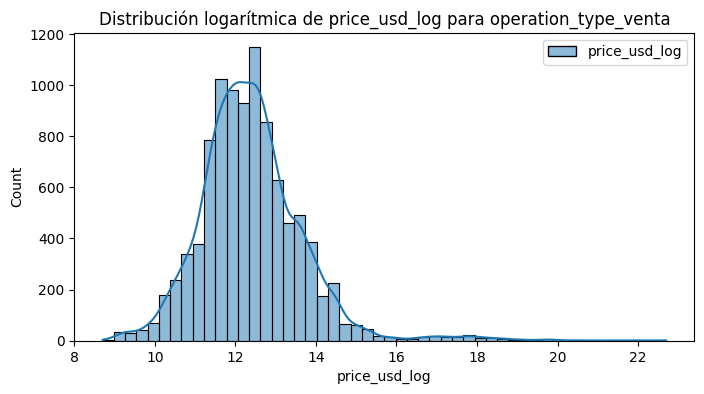

/Users/cosmos/Adri/Developer/DataScience/Clases y Consignas/Proyecto Final/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cosmos/Adri/Developer/DataScience/Clases y Consignas/Proyecto Final/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/cosmos/Adri/Developer/DataScience/Clases y Consignas/Proyecto Final/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,

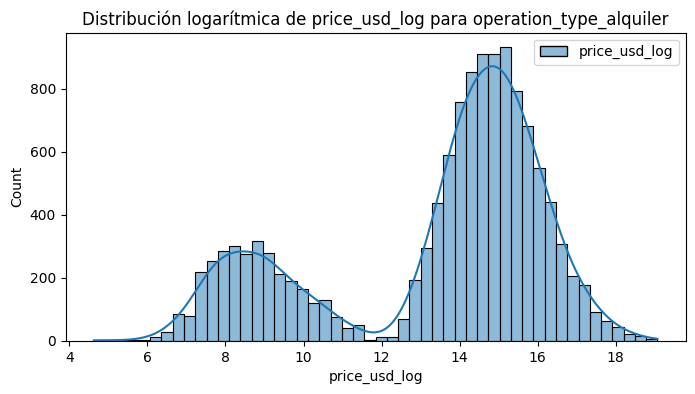

/Users/cosmos/Adri/Developer/DataScience/Clases y Consignas/Proyecto Final/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cosmos/Adri/Developer/DataScience/Clases y Consignas/Proyecto Final/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/cosmos/Adri/Developer/DataScience/Clases y Consignas/Proyecto Final/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,

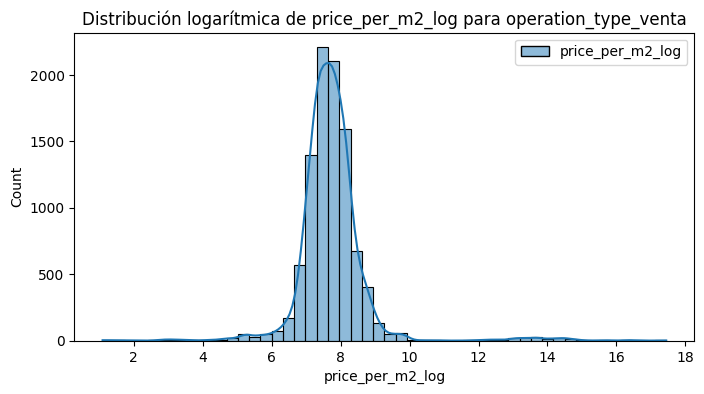

/Users/cosmos/Adri/Developer/DataScience/Clases y Consignas/Proyecto Final/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cosmos/Adri/Developer/DataScience/Clases y Consignas/Proyecto Final/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/cosmos/Adri/Developer/DataScience/Clases y Consignas/Proyecto Final/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,

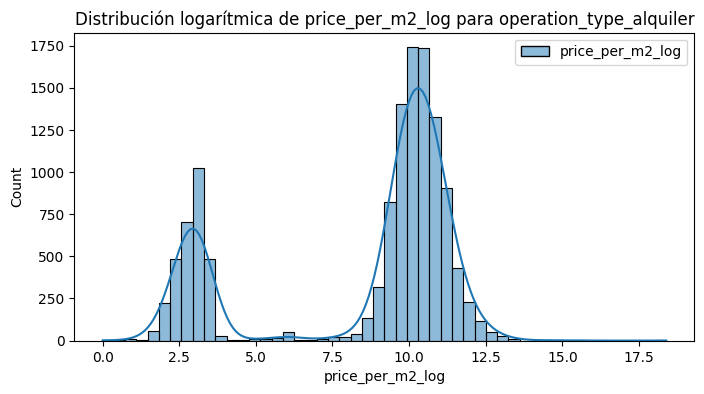

In [534]:
for i, p in enumerate(price_vars): 
    for cat in categories:
        sub_df = df[df[cat] == True]
        plt.figure(figsize=(8, 4))
        sns.histplot(sub_df[[p]], bins=50, kde=True)
        plt.title(f'Distribución logarítmica de {p} para {cat}')
        plt.xlabel(f'{p}')
        plt.show()

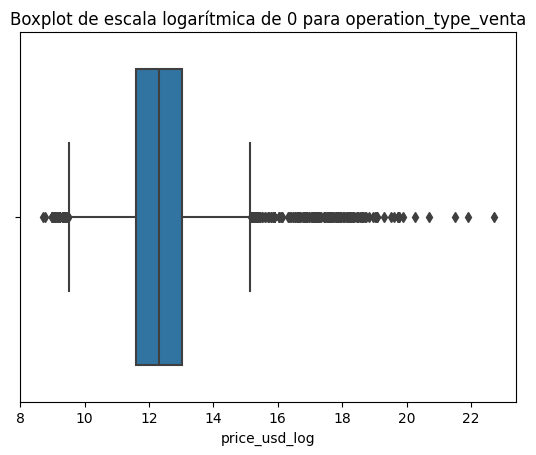

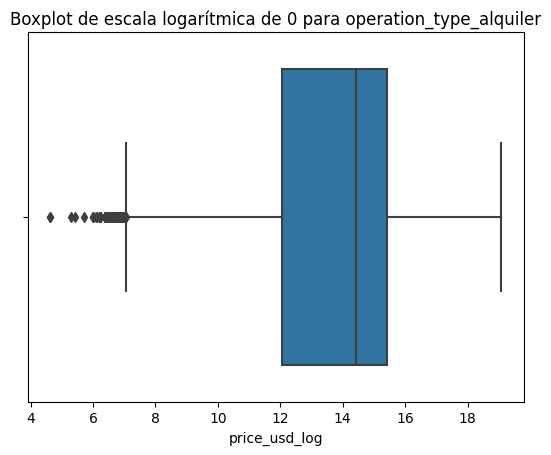

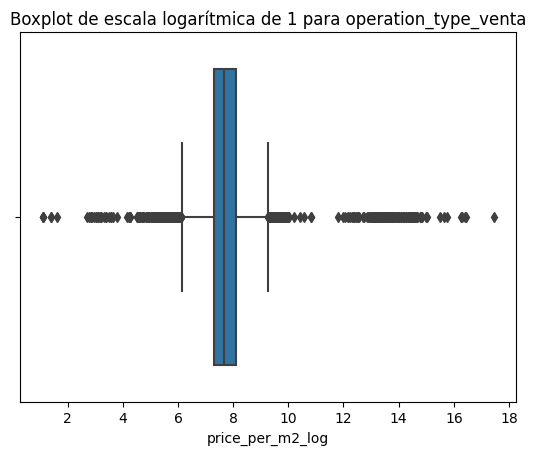

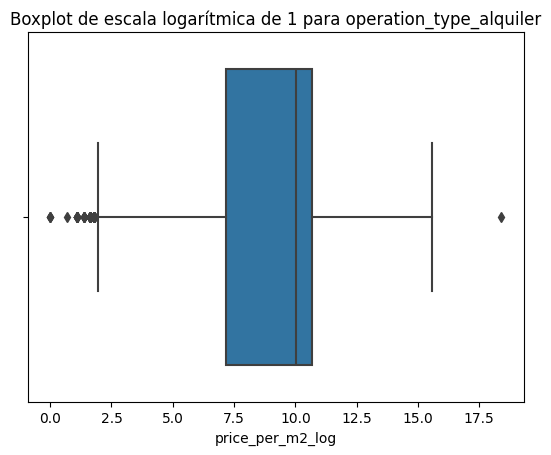

<Figure size 640x480 with 0 Axes>

In [536]:
for i, p in enumerate(price_vars):
    for cat in categories:
        sub_df = df[df[cat] == True]
        sns.boxplot(x=sub_df[p])
        plt.title(f'Boxplot de escala logarítmica de {i} para {cat}')
        plt.xlabel(f'{p}')
        plt.show()

plt.tight_layout()

### 3.2 Estableciendo los límites para outliers

Busco los límites preliminares que respondan mejor a la distribución de cada tipo de operación: venta y alquiler

#### Primer barrido

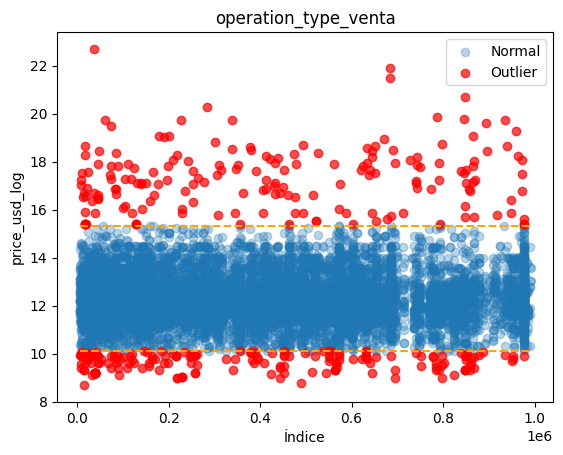

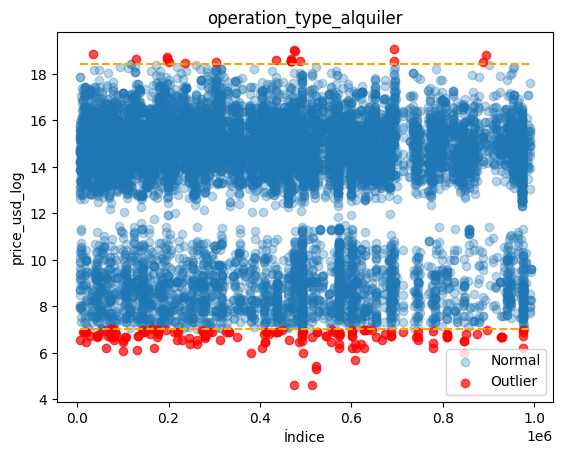

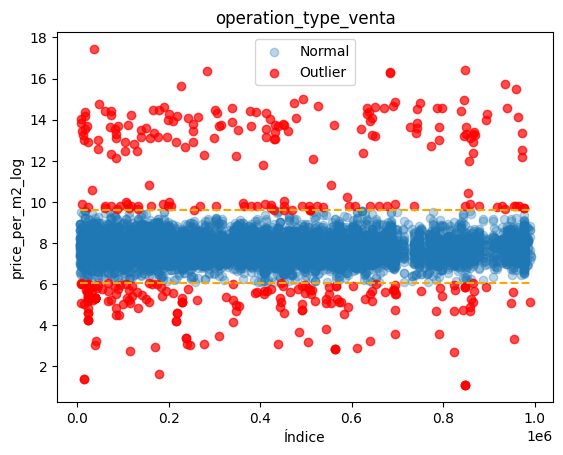

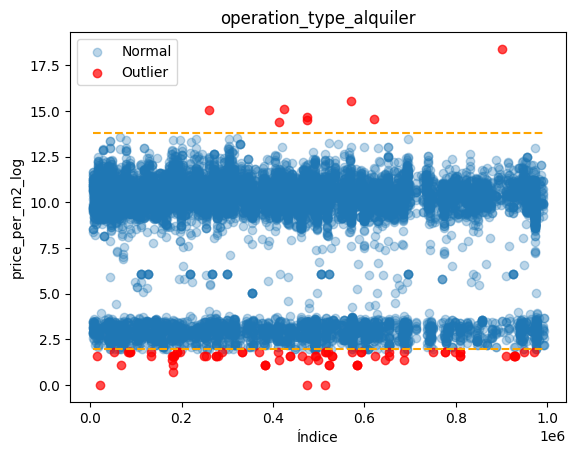

<Figure size 640x480 with 0 Axes>

In [537]:
# Filtrado por percentiles ajustado para cada tipo de operación


for i, p in enumerate(price_vars):
    for cat in categories:
        sub_df = df[df[cat] == True]
        if cat == 'operation_type_venta':
            lower = sub_df[p].quantile(0.02)
            upper = sub_df[p].quantile(0.98)

            outliers_venta = sub_df[(sub_df[p] < lower) | (sub_df[p] > upper)] # Para usar más adelante en análisis de outliers
            
        elif cat == 'operation_type_alquiler':
            Q1 = sub_df[p].quantile(0.25)
            Q3 = sub_df[p].quantile(0.75)
                
            IQR = Q3 - Q1
            lower = Q1 - 1.5*IQR
            upper = Q3 + 0.9*IQR

            outliers_alquiler = sub_df[(sub_df[p] < lower) | (sub_df[p] > upper)] #  Para usar más adelante en análisis de outliers
            
            
        outliers = sub_df[(sub_df[p] < lower) | (sub_df[p] > upper)]
        normal = sub_df[(sub_df[p] >= lower) & (sub_df[p] <= upper)]
        
        plt.scatter(normal.index, normal[p], alpha=0.3, label='Normal')
        plt.scatter(outliers.index, outliers[p], alpha=0.7, color='red', label='Outlier')
        plt.hlines([lower, upper], xmin=sub_df.index.min(), xmax=sub_df.index.max(), colors='orange', linestyles='dashed')
        
        plt.title(cat)
        plt.xlabel('Índice')
        plt.ylabel(p)
        plt.legend()
        plt.show()

plt.tight_layout()



In [538]:
print(f'Cantidad de outliers para la Venta: {outliers_venta.shape}')
print(f'Cantidad de outliers para Alquiler: {outliers_alquiler.shape}')

Cantidad de outliers para la Venta: (392, 57)
Cantidad de outliers para Alquiler: (85, 57)


In [539]:
# Se remueve la primer capa de outliers
print(f'Tamaño del dataframe antes de limpiar los outliers: {df.shape}')

df = df.drop(outliers_venta.index, axis=0)
df = df.drop(outliers_alquiler.index, axis=0)

print(f'Tamaño del dataframe después de limpiar los outliers: {df.shape}')

Tamaño del dataframe antes de limpiar los outliers: (22207, 57)
Tamaño del dataframe después de limpiar los outliers: (21730, 57)


#### Visualización de boxplots sin primer barrido de outliers

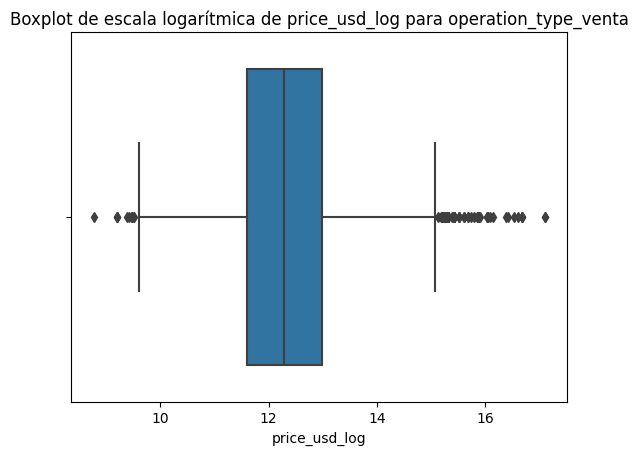

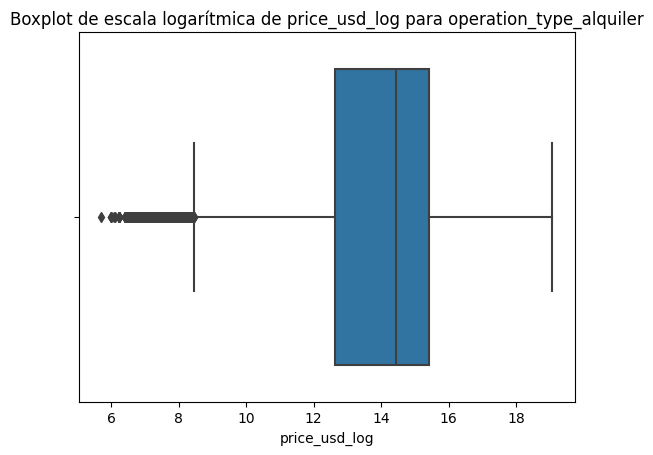

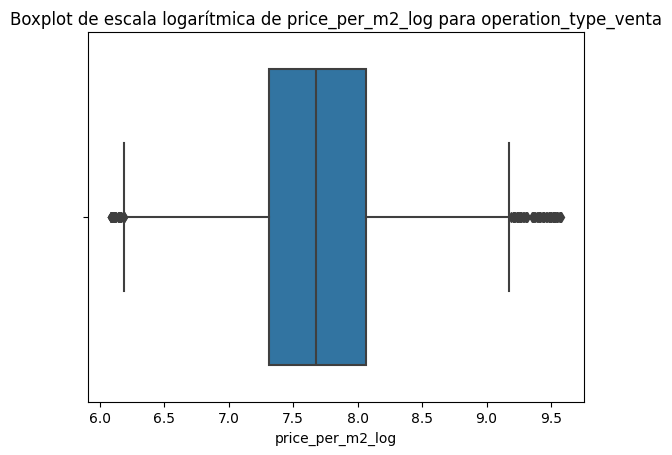

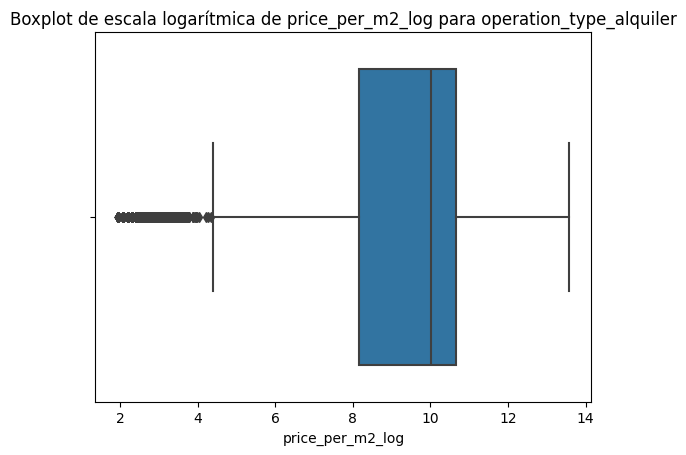

<Figure size 640x480 with 0 Axes>

In [540]:
for i, p in enumerate(price_vars):
    for cat in categories:
        sub_df = df[df[cat] == True]
        sns.boxplot(x=sub_df[p])
        plt.title(f'Boxplot de escala logarítmica de {p} para {cat}')
        plt.xlabel(f'{p}')
        plt.show()

plt.tight_layout()

### 3.3 Limpieza de columnas creadas para el análisis de outliers

In [541]:
df.columns

Index(['surface_covered', 'neighborhood_encoded', 'price_usd', 'price_per_m2',
       'operation_type_alquiler', 'operation_type_venta',
       'rooms_cat_(0.999,_2.0]', 'rooms_cat_(2.0,_3.0]',
       'rooms_cat_(3.0,_5.0]', 'rooms_cat_(5.0,_40.0]',
       'rooms_cat_desconocido', 'bathrooms_cat_(0.999,_2.0]',
       'bathrooms_cat_(2.0,_20.0]', 'bathrooms_cat_desconocido',
       'property_type_local_comercial', 'property_type_oficina',
       'neighborhood_abasto', 'neighborhood_almagro', 'neighborhood_balvanera',
       'neighborhood_barracas', 'neighborhood_barrio_norte',
       'neighborhood_belgrano', 'neighborhood_boca', 'neighborhood_boedo',
       'neighborhood_caballito', 'neighborhood_catalinas',
       'neighborhood_centro__microcentro', 'neighborhood_chacarita',
       'neighborhood_colegiales', 'neighborhood_congreso',
       'neighborhood_constitución', 'neighborhood_flores',
       'neighborhood_floresta', 'neighborhood_liniers',
       'neighborhood_mataderos', 'neighb

In [542]:
df = df.drop(['price_usd_log', 'price_per_m2_log'], axis=1)
df.shape

(21730, 55)

In [543]:
print(f'Tamaño original del df de propiedades tipo oficina y locales comerciales: {df_size_pre_outliers}')
print(f'Tamaño original del df de propiedades tipo oficina y locales comerciales sin outliers: {df.shape[0]}')
print(f'Total de outliers eliminados: {df_size_pre_outliers - df.shape[0]}')
print(f'% de outliers eliminados: {(df_size_pre_outliers - df.shape[0]) * 100 / df_size_pre_outliers:.2f}%')

Tamaño original del df de propiedades tipo oficina y locales comerciales: 22207
Tamaño original del df de propiedades tipo oficina y locales comerciales sin outliers: 21730
Total de outliers eliminados: 477
% de outliers eliminados: 2.15%


In [544]:
df['price_usd'].describe().apply(lambda x: f"{x:,.0f}")

count         21,730
mean       2,924,028
std        7,887,568
min              300
25%          115,000
50%          520,000
75%        2,498,650
max      192,000,000
Name: price_usd, dtype: object

In [545]:
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,surface_covered,0,0.0,0,0.000000,1048,float64
1,neighborhood_encoded,0,0.0,139,0.006397,39,int64
2,price_usd,0,0.0,0,0.000000,5378,float64
3,price_per_m2,0,0.0,0,0.000000,8678,float64
4,operation_type_alquiler,0,0.0,9362,0.430833,2,bool
5,operation_type_venta,0,0.0,12368,0.569167,2,bool
6,"rooms_cat_(0.999,_2.0]",0,0.0,19673,0.905338,2,bool
7,"rooms_cat_(2.0,_3.0]",0,0.0,21359,0.982927,2,bool
8,"rooms_cat_(3.0,_5.0]",0,0.0,21185,0.974919,2,bool
9,"rooms_cat_(5.0,_40.0]",0,0.0,21219,0.976484,2,bool


## Conclusiones y Storytelling

Se partió de un total de 25mil datos de Oficinas y Locales Comerciales en CABA.<br>
Se pasó todo a USD usando los valores históricos del dólar blue el día de la creación del aviso.<br>
Se eliminaron los Alquileres Temporarios por ser una categoría poco representativa por tener solo 53 datos.<br>
Se sacaron los outliers ajustando los límites basado en observar los scatter plots de los precios logarítmicos y sus boxplots.
El porcentaje de datos elminados por considerarse outliers es de menos del 3% (2,76)<br>



## 4. Guardado de pickles y data procesada

### 4.1 Las columnas de OHE

In [546]:
import pickle

#si /models no existe, lo creo
import os   
if not os.path.exists('../models'):
    os.makedirs('../models')

with open('../models/categories_ohe.pickle', 'wb') as handle:
    pickle.dump(df.columns, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 4.2 Los bins

In [549]:
with open('../models/bins_bathrooms_cat.pickle', 'wb') as handle:
    pickle.dump(bins_bathrooms_cat, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('../models/bins_rooms_cat.pickle', 'wb') as handle:
    pickle.dump(bins_rooms_cat, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 4.3 Dataset procesado

In [548]:
#si /data no existe, lo creo
import os   
if not os.path.exists('data'):
    os.makedirs('data')

df.to_csv('../data/data_processed.csv', index=False)
